In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Input
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [2]:
X, Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


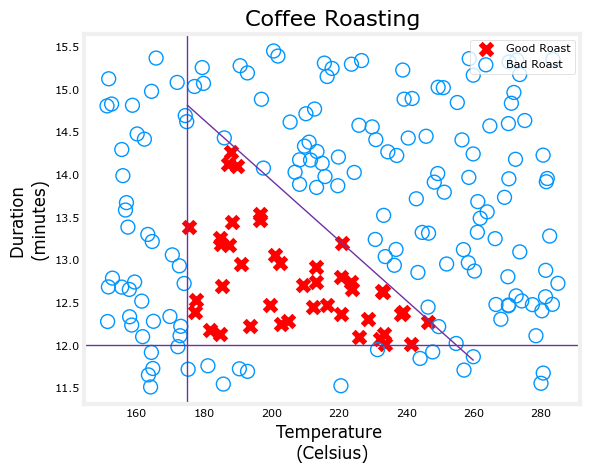

In [3]:
plt_roast(X,Y)

Normalize Data

In [4]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")

# Normalize the data with keras layers
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(X) # learns the mean and variance of the data
Xn = normalizer(X) # normalizes the data

print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")



Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [5]:
Xt = np.tile(Xn, (1000, 1)) # repeat the data 1000 times to increase training set size and reduce number of training epochs, epochs means the number of times the model sees the data
Yt = np.tile(Y, (1000, 1))

print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [6]:
# Set the seed for reproducibility
tf.random.set_seed(1234)

# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(2,)),
    tf.keras.layers.Dense(3, activation='sigmoid', name = 'layer1'),
    tf.keras.layers.Dense(1, activation='sigmoid', name = 'layer2')
])


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

- In the first layer with 3 units, we expect W to have a size of (2,3) and  𝑏 should have 3 elements.
- In the second layer with 1 unit, we expect W to have a size of (3,1) and  𝑏 should have 1 element.

In [8]:
L1_num_params = 2 * 3 + 3 # 2 input weights + 1 bias for each of the 3 neurons
L2_num_params = 3 * 1  + 1 # 3 input weights + 1 bias for the output neuron

In [9]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.77 -0.83  0.72]
 [ 1.03  0.2  -0.89]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.78]
 [ 0.98]
 [ 1.21]] 
b2(1,): [0.]


- model.compile() defines a loss function and specifies a compile optimization.
- model.fit runs gradient descent and fits the weights to the data.

In [10]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(
    Xt, Yt,
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 462us/step - loss: 0.2772
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 464us/step - loss: 0.0320
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 458us/step - loss: 0.0162
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 482us/step - loss: 0.0106
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 481us/step - loss: 0.0075
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 474us/step - loss: 0.0054
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 502us/step - loss: 0.0039
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 467us/step - loss: 0.0029
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 469us/step - loss: 0.0022
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 459us/step - loss: 0.0017


- In the fit statement above, the number of epochs was set to 10. This specifies that the entire data set should be applied during training 10 times.
- For efficiency, the training data set is broken into 'batches'. The default size of a batch in Tensorflow is 32. There are 200000 examples in our expanded data set or 6250 batches.

Updated Weights

In [11]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 1.45e+01 -8.54e-03  1.34e+01]
 [ 1.21e+01 -9.75e+00  3.57e-01]] 
b1: [  1.98 -12.14  14.  ]
W2:
 [[-47.11]
 [-50.84]
 [ 43.86]] 
b2: [-13.55]


Predictions

In [12]:
X_test = np.array([
    [200,13.9],  # positive example
    [200,17]])   # negative example
X_testn = normalizer(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predictions = 
 [[9.79e-01]
 [5.03e-08]]


In [13]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


Layer Functions

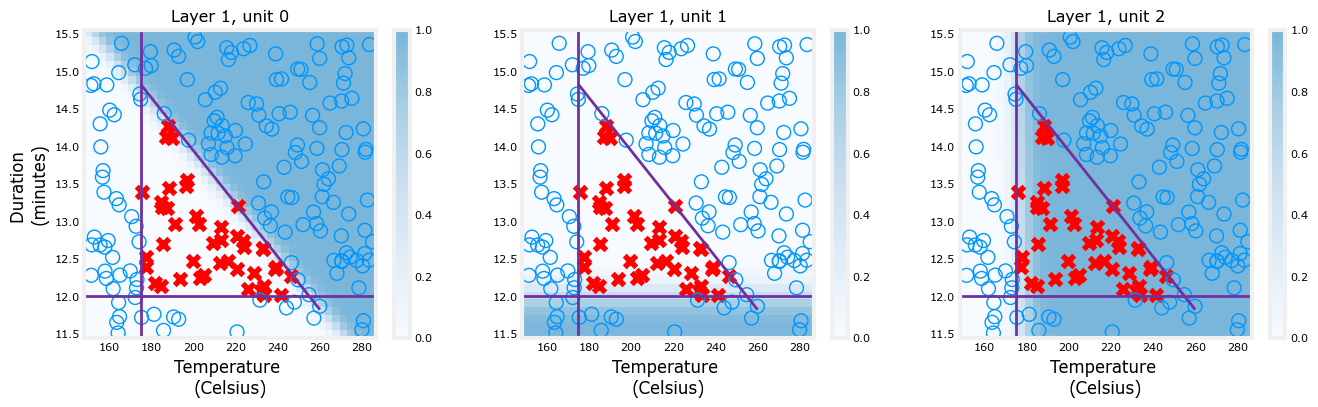

In [14]:
plt_layer(X,Y.reshape(-1,),W1,b1,normalizer)

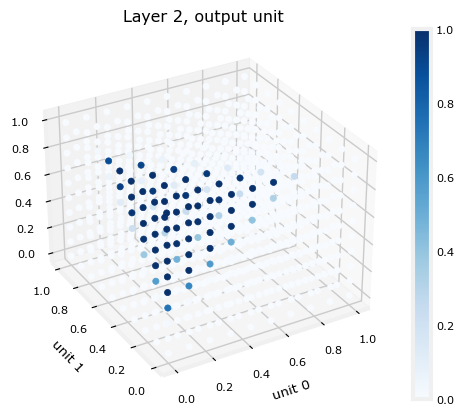

In [15]:
plt_output_unit(W2,b2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

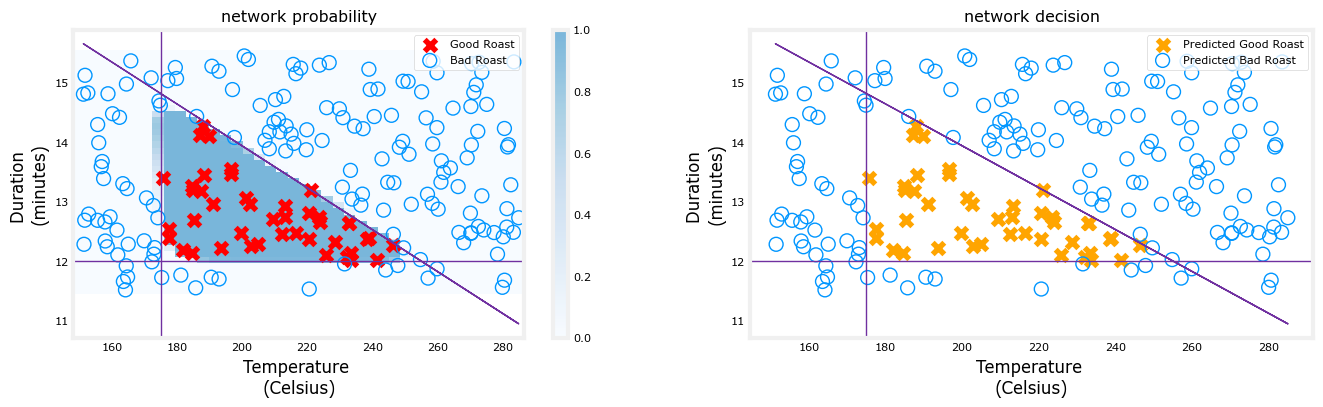

In [16]:
netf= lambda x : model.predict(normalizer(x))
plt_network(X,Y,netf)